In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
from cryocat import cryomotl
from cryocat import visplot
import seaborn as sns
import matplotlib.pyplot as plt
from cryocat import ribana as ra
from matplotlib import rc
import matplotlib as mtl

In [4]:
mtl.rcParams['font.sans-serif'] = "Arial"
mtl.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'
sns.set_palette('colorblind')

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
motl_untreated=cryomotl.Motl(motl_path='motl_j056_classified_bin2_tr9nm.em')
motl_treated=cryomotl.Motl(motl_path='motl_j010_classified_bin2_tr9nm.em')

motl_entry_u = 'entry_motl_j056_bin2_tr9nm.em'
motl_entry_t = 'entry_motl_j010_bin2_tr9nm.em'

motl_exit_u = 'exit_motl_j056_bin2_tr9nm.em'
motl_exit_t = 'exit_motl_j010_bin2_tr9nm.em'

pixel_size = 0.2446

In [7]:
class_u=ra.get_class_polysome_occupancies_mp(motl_untreated)
class_t=ra.get_class_polysome_occupancies_mp(motl_treated)

In [8]:
class_u['chain_type'] = class_u['chain_type'].values + '_untreated'
class_t['chain_type'] = class_t['chain_type'].values + '_treated'
all_classes = pd.concat((class_u,class_t), ignore_index = True)
all_assigned_classes = all_classes.loc[ all_classes['class'] != 0, :]

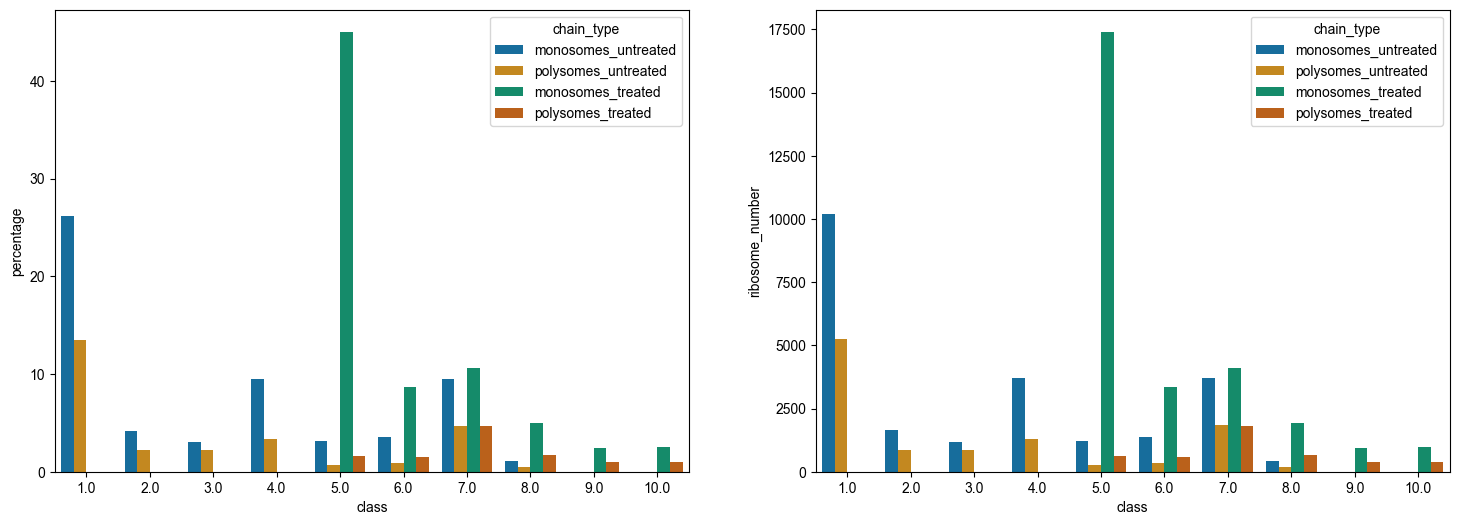

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
g = sns.barplot(ax=axes[0], data=all_assigned_classes, x='class', y='percentage', hue='chain_type')
sns.move_legend(g, "upper right")
g = sns.barplot(ax=axes[1], data=all_assigned_classes, x='class', y='ribosome_number', hue='chain_type')
g = sns.move_legend(g, "upper right")

In [10]:
polysomes = []
dist = []
for i in np.arange(2, 25+1, 1):
    input_name = './traced_min_max_0.5/tmotl_j010_' + str(i) + 'nm_bin2.em'
    motl = cryomotl.Motl(motl_path=input_name)
    mdf = motl.df
    mdf.sort_values(['tomo_id','object_id','geom2'], inplace=True)
    chain_occupancy = mdf.groupby(['tomo_id','object_id'])['geom2'].max().values
    polysomes.append(chain_occupancy[ chain_occupancy > 1 ].sum())
    dist.append(i)

treated_df=pd.DataFrame(columns=['distance', 'occupancy'])
treated_df['distance'] = dist
treated_df['occupancy'] = polysomes

In [11]:
polysomes = []
dist = []
for i in np.arange(2, 25+1, 1):
    input_name = './traced_min_max_0.5/tmotl_j056_' + str(i) + 'nm_bin2.em'
    motl = cryomotl.Motl(motl_path=input_name)
    mdf = motl.df
    mdf.sort_values(['tomo_id','object_id','geom2'], inplace=True)
    chain_occupancy = mdf.groupby(['tomo_id','object_id'])['geom2'].max().values
    polysomes.append(chain_occupancy[ chain_occupancy > 1 ].sum())
    dist.append(i)

untreated_df=pd.DataFrame(columns=['distance', 'occupancy'])
untreated_df['distance'] = dist
untreated_df['occupancy'] = polysomes

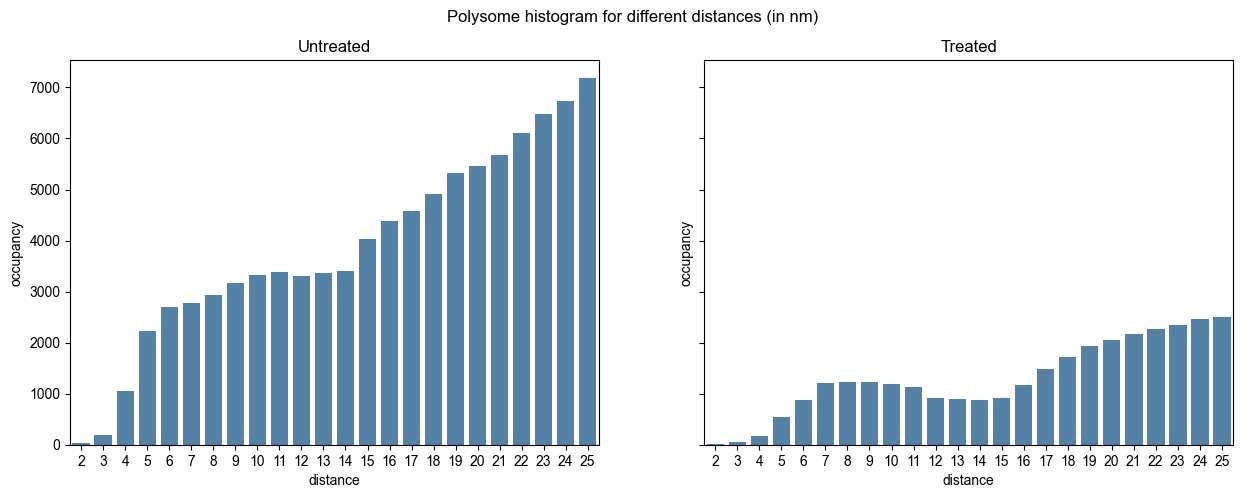

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], data=untreated_df, x='distance', y='occupancy', color='steelblue')
sns.barplot(ax=axes[1], data=treated_df, x='distance', y='occupancy', color='steelblue')
axes[0].set_title('Untreated')
axes[1].set_title('Treated')
fig.suptitle('Polysome histogram for different distances (in nm)')
plt.savefig('chain_length.svg',transparent=True)

In [13]:
polysome_stats_u = ra.get_polysome_stats(motl_entry_u, motl_exit_u, pixel_size = pixel_size, feature = 'geom1')
monosome_stats_u = ra.get_monosome_stats(motl_entry_u, motl_exit_u, pixel_size = pixel_size, feature = 'geom1')

In [14]:
polysome_stats_t = ra.get_polysome_stats(motl_entry_t, motl_exit_t, pixel_size = pixel_size, feature = 'geom1')
monosome_stats_t = ra.get_monosome_stats(motl_entry_t, motl_exit_t, pixel_size = pixel_size, feature = 'geom1')


In [15]:
cc_polysome_stats_u = ra.get_polysome_stats(motl_untreated, motl_untreated, pixel_size = pixel_size, feature = 'geom1')
cc_monosome_stats_u = ra.get_monosome_stats(motl_untreated, motl_untreated, pixel_size = pixel_size, feature = 'geom1')
cc_polysome_stats_t = ra.get_polysome_stats(motl_treated, motl_treated, pixel_size = pixel_size, feature = 'geom1')
cc_monosome_stats_t = ra.get_monosome_stats(motl_treated, motl_treated, pixel_size = pixel_size, feature = 'geom1')

In [16]:
cc_polysome_stats_u['Pair type'] = 'None'
cc_polysome_stats_t['Pair type'] = 'None'

cc_polysome_stats_u.loc[(cc_polysome_stats_u['angular_distance'] > 80) & (cc_polysome_stats_u['angular_distance'] <100), 'Pair type'] = 't-t'
cc_polysome_stats_u.loc[(cc_polysome_stats_u['angular_distance'] >= 105) & (cc_polysome_stats_u['angular_distance'] < 125) & (cc_polysome_stats_u['phi'] > 110), 'Pair type'] = 't-d'
cc_polysome_stats_u.loc[(cc_polysome_stats_u['angular_distance'] >= 105) & (cc_polysome_stats_u['angular_distance'] < 125)  & (cc_polysome_stats_u['phi'] < 0), 'Pair type'] = 't-u'


cc_polysome_stats_t.loc[(cc_polysome_stats_t['angular_distance'] > 80) & (cc_polysome_stats_t['angular_distance'] <100), 'Pair type'] = 't-t'
cc_polysome_stats_t.loc[(cc_polysome_stats_t['angular_distance'] >= 105) & (cc_polysome_stats_t['angular_distance'] < 125) & (cc_polysome_stats_t['phi'] > 110), 'Pair type'] = 't-d'
cc_polysome_stats_t.loc[(cc_polysome_stats_t['angular_distance'] >= 105) & (cc_polysome_stats_t['angular_distance'] < 125)  & (cc_polysome_stats_t['phi'] < 0), 'Pair type'] = 't-u'


In [17]:
print(cc_polysome_stats_u.groupby('Pair type')['distance'].mean())
print(cc_polysome_stats_u.groupby('Pair type')['distance'].std())
print(cc_polysome_stats_t.groupby('Pair type')['distance'].mean())
print(cc_polysome_stats_t.groupby('Pair type')['distance'].std())

Pair type
None    26.670450
t-d     26.293265
t-t     25.657322
t-u     27.744936
Name: distance, dtype: float64
Pair type
None    2.480775
t-d     1.446353
t-t     1.393555
t-u     1.724723
Name: distance, dtype: float64
Pair type
None    26.138218
t-d     24.910026
t-t     25.800929
t-u     27.162207
Name: distance, dtype: float64
Pair type
None    3.250959
t-d     3.403575
t-t     1.569997
t-u     1.738280
Name: distance, dtype: float64


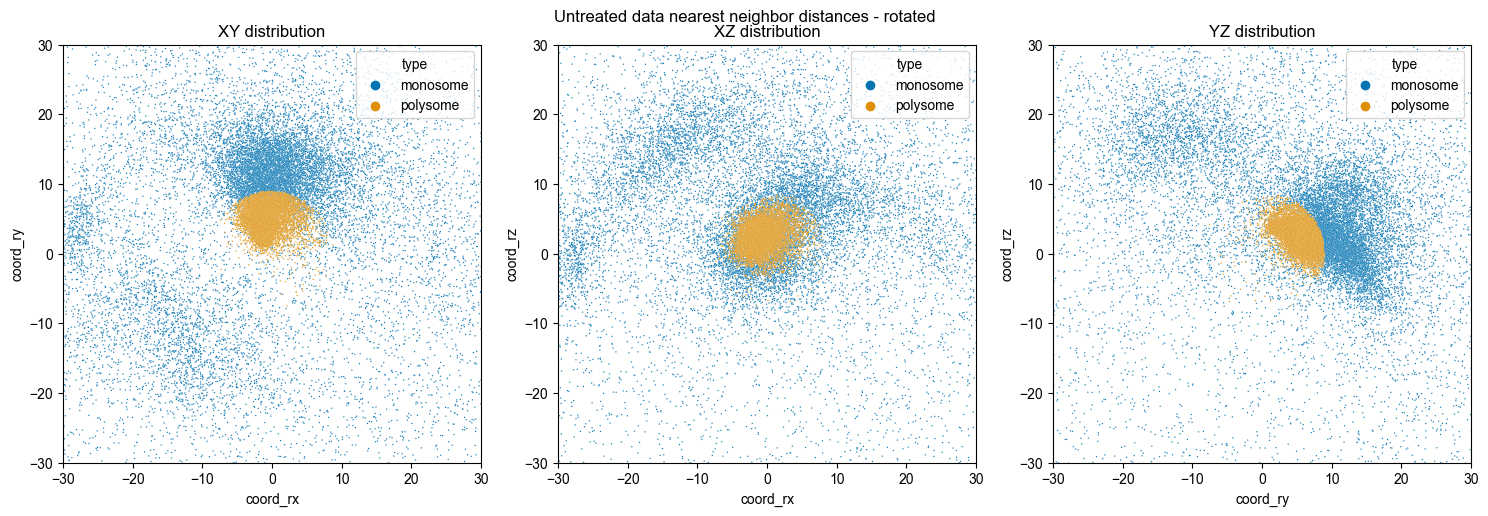

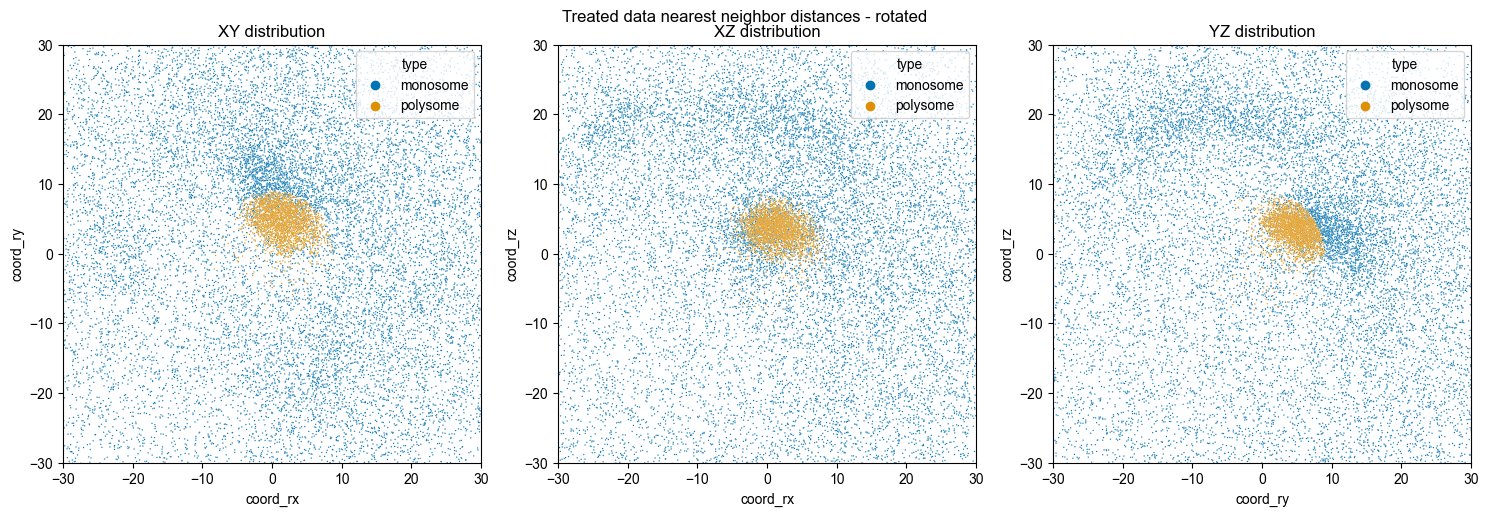

In [18]:
stats_u = pd.concat((monosome_stats_u,polysome_stats_u), ignore_index = True)
ra.plot_nn_rot_coord_df(stats_u, displ_threshold=30, marker_size=1, title = 'Untreated data nearest neighbor distances - rotated', output_name = 'untreated_rotated.svg')

stats_t = pd.concat((monosome_stats_t,polysome_stats_t), ignore_index = True)
ra.plot_nn_rot_coord_df(stats_t, displ_threshold=30, marker_size=1, title = 'Treated data nearest neighbor distances - rotated', output_name = 'treated_rotated.svg')

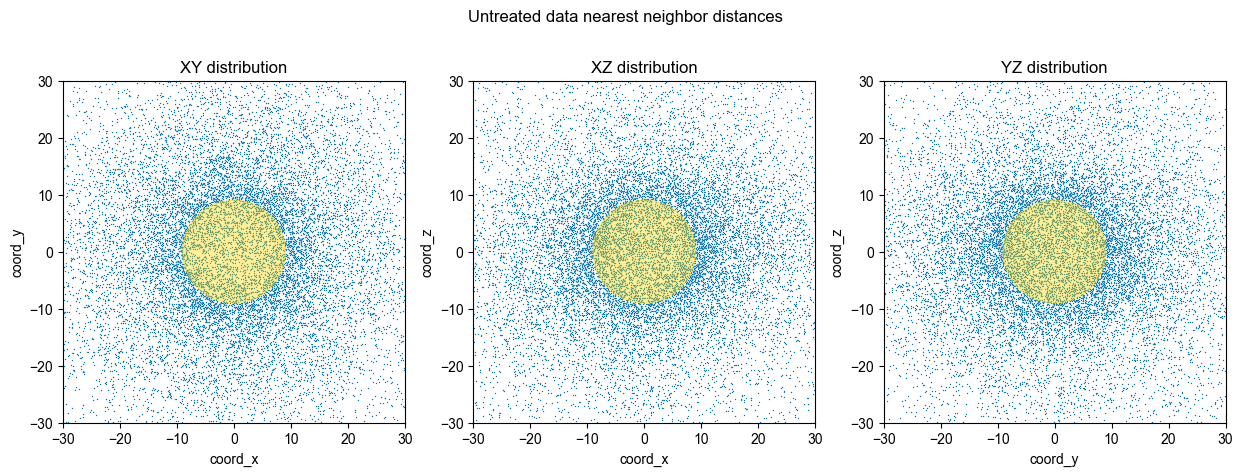

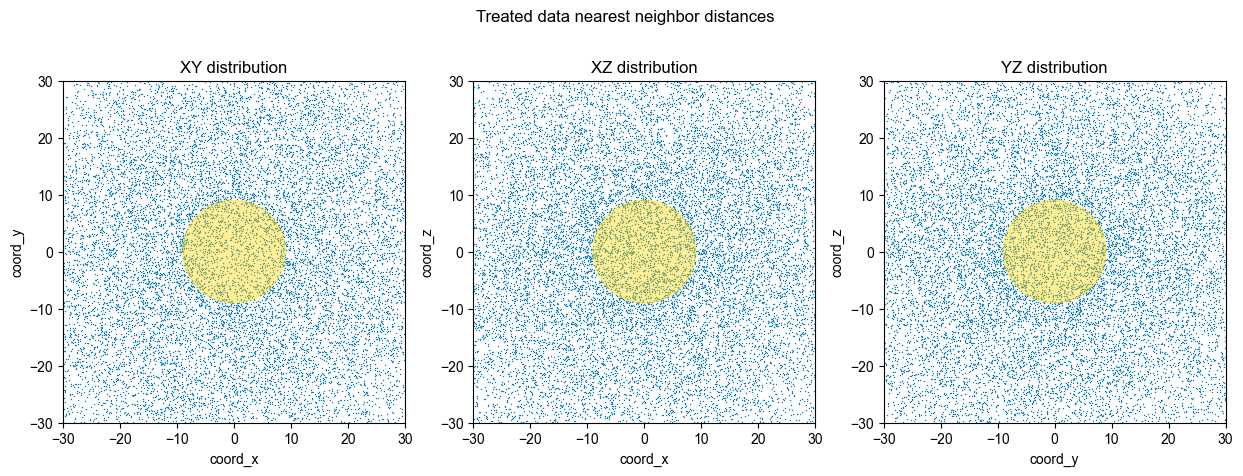

In [19]:
ra.plot_nn_coord_df(monosome_stats_u, 9, displ_threshold=30, marker_size=1, title = 'Untreated data nearest neighbor distances', output_name = 'untreated.svg')
ra.plot_nn_coord_df(monosome_stats_t, 9, displ_threshold=30, marker_size=1, title = 'Treated data nearest neighbor distances', output_name = 'treated.svg')

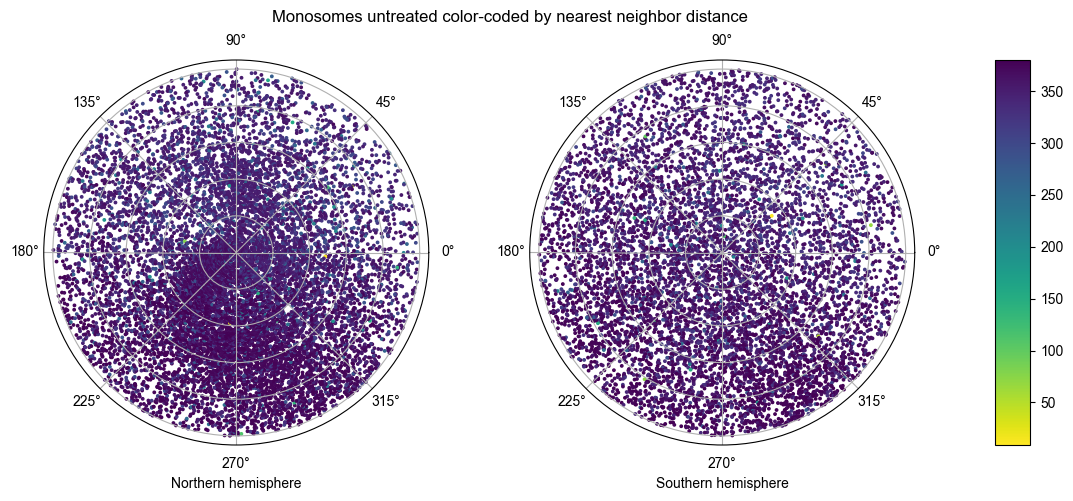

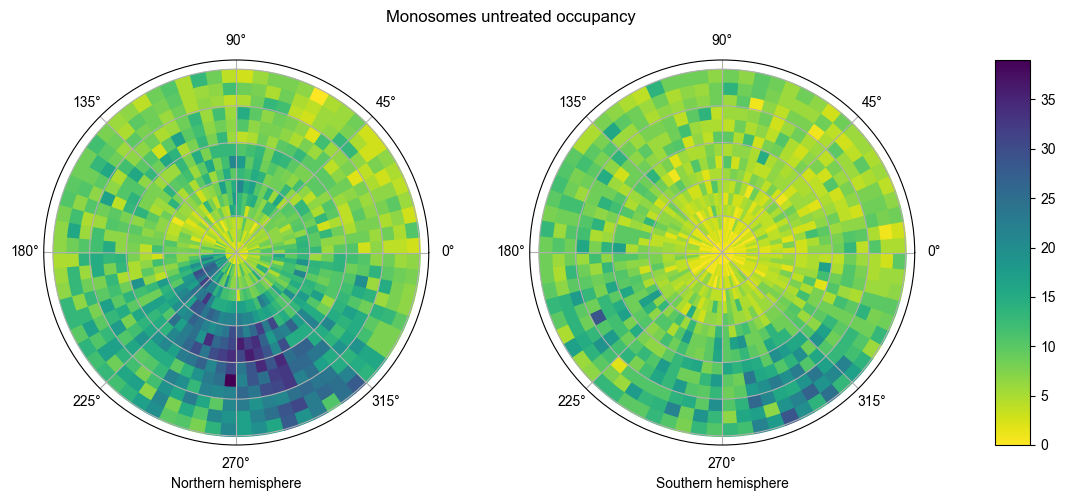

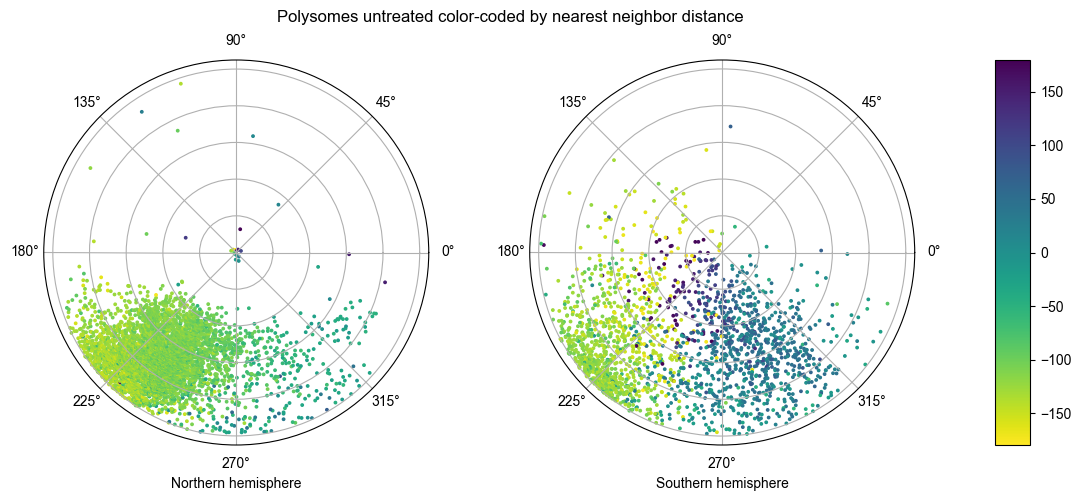

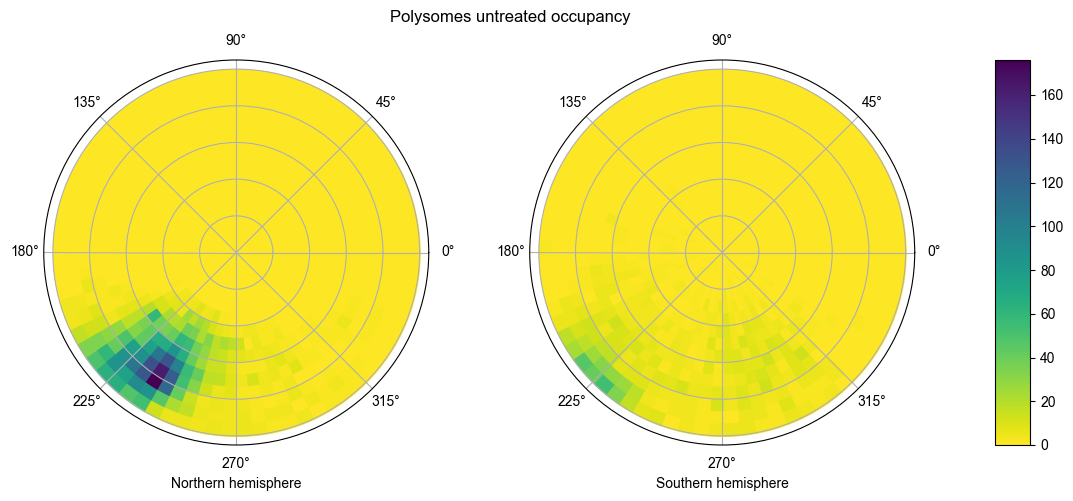

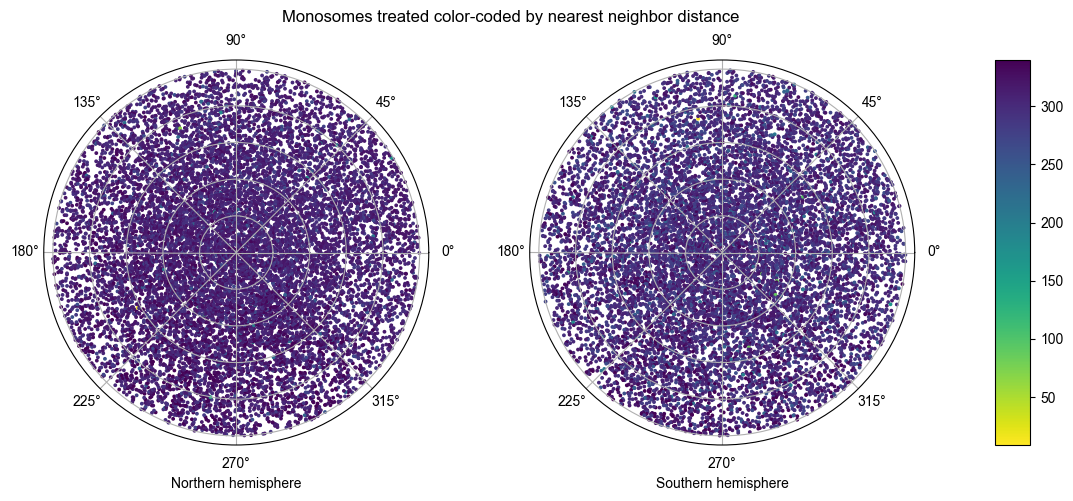

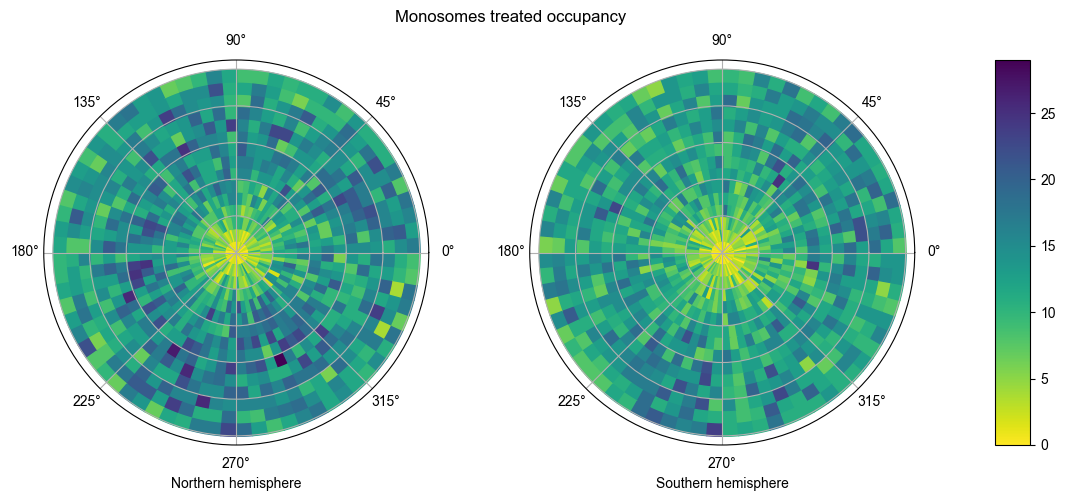

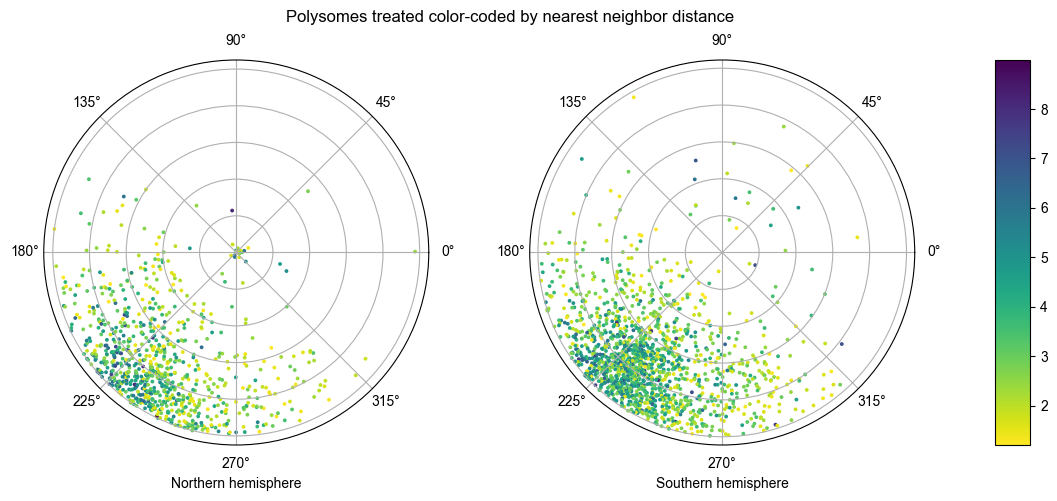

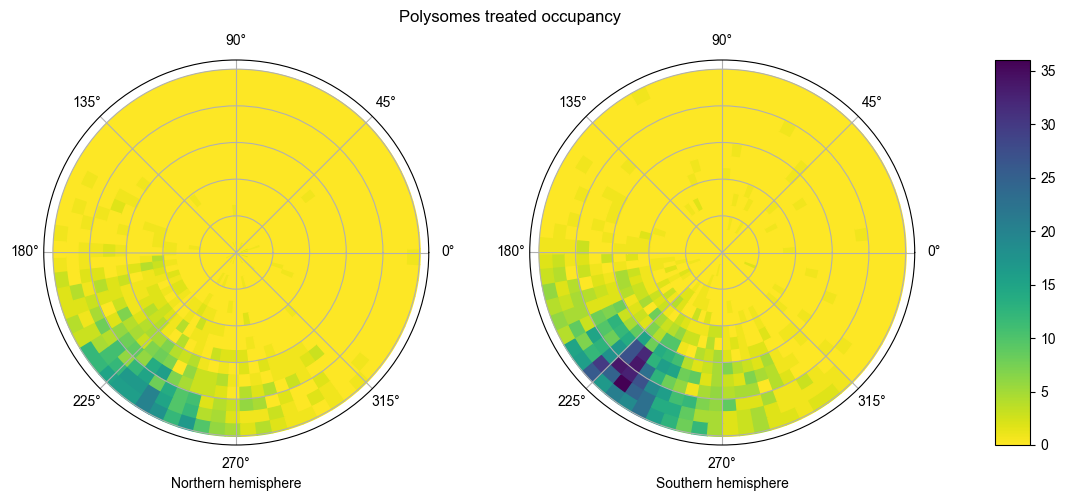

In [20]:
visplot.plot_polar_nn_distances(monosome_stats_u[['rot_x','rot_y', 'rot_z']].values, monosome_stats_u['distance'].values, graph_title='Monosomes untreated color-coded by nearest neighbor distance')
visplot.plot_orientational_distribution(monosome_stats_u[['rot_x','rot_y', 'rot_z']].values, graph_title='Monosomes untreated occupancy', radius_bin=16)

visplot.plot_polar_nn_distances(polysome_stats_u[['rot_x','rot_y', 'rot_z']].values, polysome_stats_u['phi'].values, graph_title='Polysomes untreated color-coded by nearest neighbor distance')
visplot.plot_orientational_distribution(polysome_stats_u[['rot_x','rot_y', 'rot_z']].values, graph_title='Polysomes untreated occupancy', radius_bin=16)

visplot.plot_polar_nn_distances(monosome_stats_t[['rot_x','rot_y', 'rot_z']].values, monosome_stats_t['distance'].values, graph_title='Monosomes treated color-coded by nearest neighbor distance')
visplot.plot_orientational_distribution(monosome_stats_t[['rot_x','rot_y', 'rot_z']].values, graph_title='Monosomes treated occupancy', radius_bin=16)

visplot.plot_polar_nn_distances(polysome_stats_t[['rot_x','rot_y', 'rot_z']].values, polysome_stats_t['distance'].values, graph_title='Polysomes treated color-coded by nearest neighbor distance')
visplot.plot_orientational_distribution(polysome_stats_t[['rot_x','rot_y', 'rot_z']].values, graph_title='Polysomes treated occupancy', radius_bin=16)





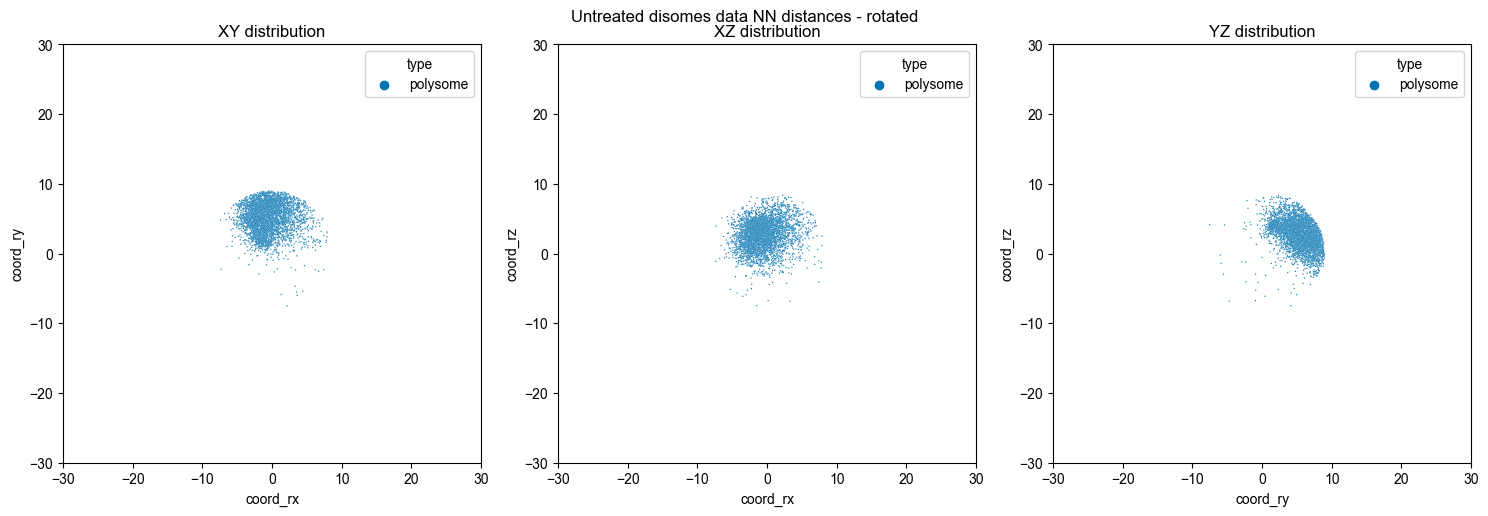

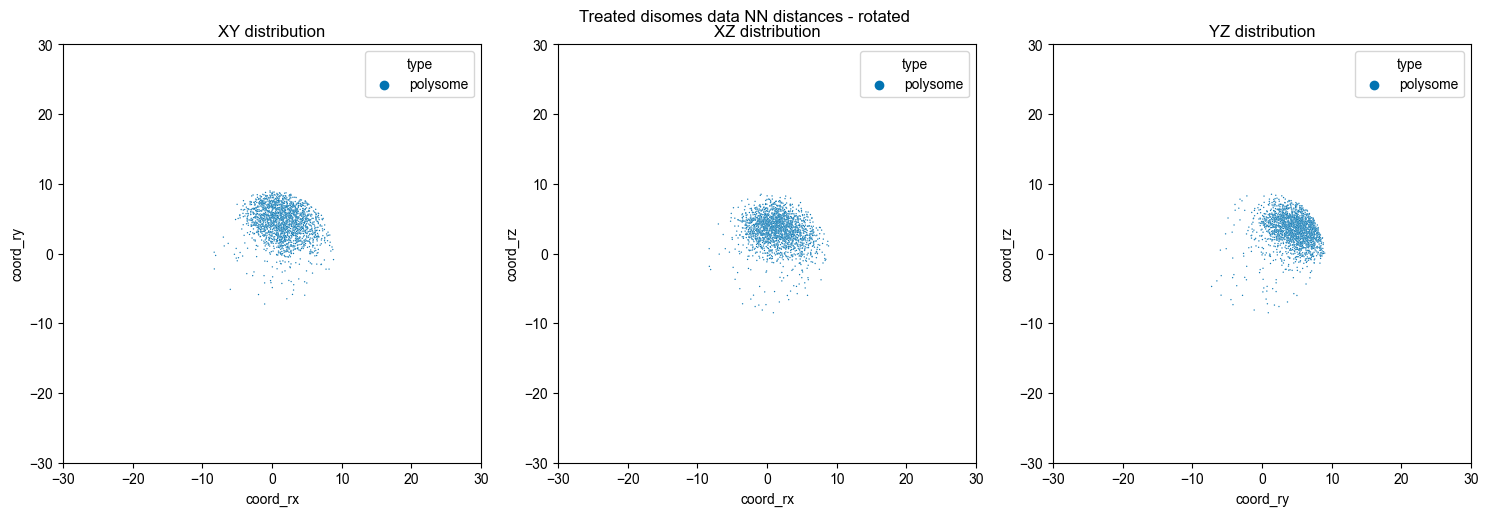

In [21]:
disomes = polysome_stats_u[polysome_stats_u['polysome_length'] == 2]
ra.plot_nn_rot_coord_df(disomes, displ_threshold=30, marker_size=1, title = 'Untreated disomes data NN distances - rotated', output_name = 'disomes_untreated_rotated.svg')

disomes = polysome_stats_t[polysome_stats_t['polysome_length'] == 2]
ra.plot_nn_rot_coord_df(disomes, displ_threshold=30, marker_size=1, title = 'Treated disomes data NN distances - rotated', output_name = 'disomes_treated_rotated.svg')


Untreated t-t pairs: 2842 out of 6955 pairs which corresponds to 40.86%
Untreated t-d pairs: 1128 out of 6955 pairs which corresponds to 16.22%
Untreated t-u pairs: 311 out of 6955 pairs which corresponds to 4.47%
Treated t-t pairs: 829 out of 2380 pairs which corresponds to 34.83%
Treated t-d pairs: 11 out of 2380 pairs which corresponds to 0.46%
Treated t-u pairs: 226 out of 2380 pairs which corresponds to 9.50%


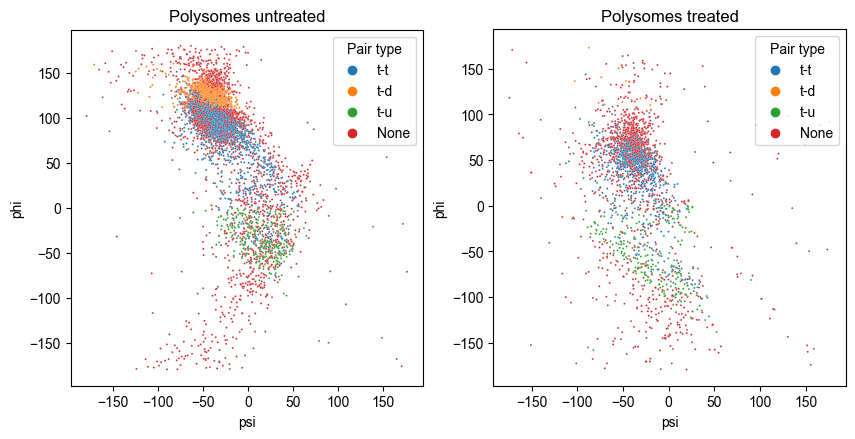

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

polysome_stats_u['Pair type'] = 'None'
polysome_stats_t['Pair type'] = 'None'

polysome_stats_u.loc[(polysome_stats_u['angular_distance'] > 80) & (polysome_stats_u['angular_distance'] <100), 'Pair type'] = 't-t'
polysome_stats_u.loc[(polysome_stats_u['angular_distance'] >= 105) & (polysome_stats_u['angular_distance'] < 125) & (polysome_stats_u['phi'] > 110), 'Pair type'] = 't-d'
polysome_stats_u.loc[(polysome_stats_u['angular_distance'] >= 105) & (polysome_stats_u['angular_distance'] < 125)  & (polysome_stats_u['phi'] < 0), 'Pair type'] = 't-u'


polysome_stats_t.loc[(polysome_stats_t['angular_distance'] > 80) & (polysome_stats_t['angular_distance'] <100), 'Pair type'] = 't-t'
polysome_stats_t.loc[(polysome_stats_t['angular_distance'] >= 105) & (polysome_stats_t['angular_distance'] < 125) & (polysome_stats_t['phi'] > 110), 'Pair type'] = 't-d'
polysome_stats_t.loc[(polysome_stats_t['angular_distance'] >= 105) & (polysome_stats_t['angular_distance'] < 125)  & (polysome_stats_t['phi'] < 0), 'Pair type'] = 't-u'

pairs_u = len(polysome_stats_u)
pairs_u_tt = len(polysome_stats_u[polysome_stats_u['Pair type'] == 't-t'])
pairs_u_td = len(polysome_stats_u[polysome_stats_u['Pair type'] == 't-d'])
pairs_u_tu = len(polysome_stats_u[polysome_stats_u['Pair type'] == 't-u'])

print(f'Untreated t-t pairs: {pairs_u_tt} out of {pairs_u} pairs which corresponds to {pairs_u_tt/pairs_u * 100:.2f}%')
print(f'Untreated t-d pairs: {pairs_u_td} out of {pairs_u} pairs which corresponds to {pairs_u_td/pairs_u * 100:.2f}%')
print(f'Untreated t-u pairs: {pairs_u_tu} out of {pairs_u} pairs which corresponds to {pairs_u_tu/pairs_u * 100:.2f}%')

pairs_t = len(polysome_stats_t)
pairs_t_tt = len(polysome_stats_t[polysome_stats_t['Pair type'] == 't-t'])
pairs_t_td = len(polysome_stats_t[polysome_stats_t['Pair type'] == 't-d'])
pairs_t_tu = len(polysome_stats_t[polysome_stats_t['Pair type'] == 't-u'])

print(f'Treated t-t pairs: {pairs_t_tt} out of {pairs_t} pairs which corresponds to {pairs_t_tt/pairs_t * 100:.2f}%')
print(f'Treated t-d pairs: {pairs_t_td} out of {pairs_t} pairs which corresponds to {pairs_t_td/pairs_t * 100:.2f}%')
print(f'Treated t-u pairs: {pairs_t_tu} out of {pairs_t} pairs which corresponds to {pairs_t_tu/pairs_t * 100:.2f}%')

axs[0].set_title('Polysomes untreated')
axs[1].set_title('Polysomes treated')
sns.scatterplot(ax=axs[0], data=polysome_stats_u, x='psi', y='phi',  hue = 'Pair type', s = 2, hue_order = ['t-t', 't-d', 't-u', 'None'], palette='tab10')
sns.scatterplot(ax=axs[1], data=polysome_stats_t, x='psi', y='phi',  hue = 'Pair type', s = 2, hue_order = ['t-t', 't-d', 't-u', 'None'], palette='tab10')
axs[0].set_aspect('equal', 'box')
axs[1].set_aspect('equal', 'box')

#sns.move_legend(axs[0], "upper right")
sns.move_legend(axs[1], "upper right")

plt.savefig('polysomes_angles.svg',transparent=True)

In [23]:
#u_tt_mean = polysome_stats_u.loc[polysome_stats_u['Pair type'] == 't-t', 'distance'].mean() 
#u_td_mean = polysome_stats_u.loc[polysome_stats_u['Pair type'] == 't-d', 'distance'].mean() 
#u_tu_mean = polysome_stats_u.loc[polysome_stats_u['Pair type'] == 't-u', 'distance'].mean() 
print(polysome_stats_u.groupby('Pair type')['distance'].mean())
print(polysome_stats_u.groupby('Pair type')['distance'].std())
print(polysome_stats_t.groupby('Pair type')['distance'].mean())
print(polysome_stats_t.groupby('Pair type')['distance'].std())

Pair type
None    6.927775
t-d     6.415983
t-t     6.251835
t-u     7.693106
Name: distance, dtype: float64
Pair type
None    1.423731
t-d     1.343515
t-t     1.527482
t-u     1.170327
Name: distance, dtype: float64
Pair type
None    7.022190
t-d     7.577046
t-t     6.742350
t-u     7.221957
Name: distance, dtype: float64
Pair type
None    1.310059
t-d     0.853555
t-t     1.440834
t-u     1.257892
Name: distance, dtype: float64


Untreated t-t pairs: 1527 out of 3697 pairs which corresponds to 41.30%
Untreated t-d pairs: 548 out of 3697 pairs which corresponds to 14.82%
Untreated t-u pairs: 156 out of 3697 pairs which corresponds to 4.22%
Treated t-t pairs: 669 out of 1970 pairs which corresponds to 33.96%
Treated t-d pairs: 179 out of 1970 pairs which corresponds to 9.09%
Treated t-u pairs: 72 out of 1970 pairs which corresponds to 3.65%


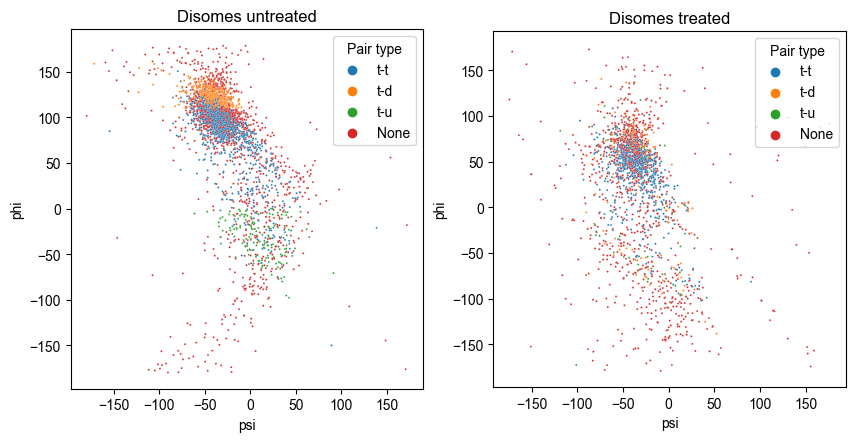

In [24]:
disomes_u = polysome_stats_u[polysome_stats_u['polysome_length'] == 2]
disomes_t = polysome_stats_t[polysome_stats_t['polysome_length'] == 2]

disomes_u['Pair type'] = 'None'
disomes_t['Pair type'] = 'None'

disomes_u.loc[(disomes_u['angular_distance'] > 80) & (disomes_u['angular_distance'] <100), 'Pair type'] = 't-t'
disomes_u.loc[(disomes_u['angular_distance'] >= 105) & (disomes_u['angular_distance'] < 125) & (disomes_u['phi'] > 110), 'Pair type'] = 't-d'
disomes_u.loc[(disomes_u['angular_distance'] >= 105) & (disomes_u['angular_distance'] < 125)  & (disomes_u['phi'] < 0), 'Pair type'] = 't-u'

disomes_t.loc[(disomes_t['angular_distance'] > 80) & (disomes_t['angular_distance'] <100), 'Pair type'] = 't-t'
disomes_t.loc[(disomes_t['angular_distance'] >= 105) & (disomes_t['angular_distance'] < 125) & (polysome_stats_u['phi'] > 110), 'Pair type'] = 't-d'
disomes_t.loc[(disomes_t['angular_distance'] >= 105) & (disomes_t['angular_distance'] < 125)  & (polysome_stats_u['phi'] < 0), 'Pair type'] = 't-u'

pairs_u = len(disomes_u)
pairs_u_tt = len(disomes_u[disomes_u['Pair type'] == 't-t'])
pairs_u_td = len(disomes_u[disomes_u['Pair type'] == 't-d'])
pairs_u_tu = len(disomes_u[disomes_u['Pair type'] == 't-u'])

print(f'Untreated t-t pairs: {pairs_u_tt} out of {pairs_u} pairs which corresponds to {pairs_u_tt/pairs_u * 100:.2f}%')
print(f'Untreated t-d pairs: {pairs_u_td} out of {pairs_u} pairs which corresponds to {pairs_u_td/pairs_u * 100:.2f}%')
print(f'Untreated t-u pairs: {pairs_u_tu} out of {pairs_u} pairs which corresponds to {pairs_u_tu/pairs_u * 100:.2f}%')

pairs_t = len(disomes_t)
pairs_t_tt = len(disomes_t[disomes_t['Pair type'] == 't-t'])
pairs_t_td = len(disomes_t[disomes_t['Pair type'] == 't-d'])
pairs_t_tu = len(disomes_t[disomes_t['Pair type'] == 't-u'])

print(f'Treated t-t pairs: {pairs_t_tt} out of {pairs_t} pairs which corresponds to {pairs_t_tt/pairs_t * 100:.2f}%')
print(f'Treated t-d pairs: {pairs_t_td} out of {pairs_t} pairs which corresponds to {pairs_t_td/pairs_t * 100:.2f}%')
print(f'Treated t-u pairs: {pairs_t_tu} out of {pairs_t} pairs which corresponds to {pairs_t_tu/pairs_t * 100:.2f}%')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Disomes untreated')
axs[1].set_title('Disomes treated')
sns.scatterplot(ax=axs[0], data=disomes_u, x='psi', y='phi', hue = 'Pair type', s = 2, hue_order = ['t-t', 't-d', 't-u', 'None'], palette='tab10')
sns.scatterplot(ax=axs[1], data=disomes_t, x='psi', y='phi', hue = 'Pair type', s = 2, hue_order = ['t-t', 't-d', 't-u', 'None'], palette='tab10')
axs[0].set_aspect('equal', 'box')
axs[1].set_aspect('equal', 'box')

sns.move_legend(axs[0], "upper right")
sns.move_legend(axs[1], "upper right")

plt.savefig('disomes_angles.svg',transparent=True)


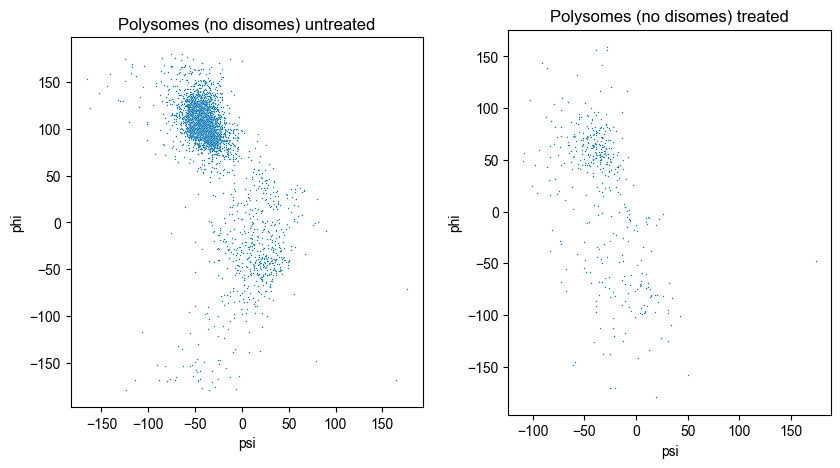

In [25]:
poly_nodisomes_u = polysome_stats_u[polysome_stats_u['polysome_length'] > 2]
poly_nodisomes_t = polysome_stats_t[polysome_stats_t['polysome_length'] > 2]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Polysomes (no disomes) untreated')
axs[1].set_title('Polysomes (no disomes) treated')
sns.scatterplot(ax=axs[0], data=poly_nodisomes_u, x='psi', y='phi', s = 1)
sns.scatterplot(ax=axs[1], data=poly_nodisomes_t, x='psi', y='phi', s = 1)
axs[0].set_aspect('equal', 'box')
axs[1].set_aspect('equal', 'box')

plt.savefig('poly_nodisomes_angles.svg',transparent=True)

In [27]:
motl_untreated=cryomotl.Motl(motl_path='motl_j056_classified_bin2_tr9nm.em')
motl_treated=cryomotl.Motl(motl_path='motl_j010_classified_bin2_tr9nm.em')

In [28]:
motl_untreated.df.to_csv('untreated_data.csv',index=False)
motl_treated.df.to_csv('treated_data.csv',index=False)